In [1]:
from neuron import h, gui
import plotly
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import plotly
from scipy.optimize import leastsq
plt.rcParams['font.size']=15

--No graphics will be displayed.


In [2]:
!nrnivmodl

/home/mjy/project/Bilinear_Network/sheasbyfohlmeister1999
capump.mod spike.mod
capump.mod spike.mod
 -> Compiling mod_func.c
 -> NMODL capump.mod
/home/mjy/anaconda/envs/pytorch/bin/x86_64-conda_cos6-linux-gnu-cc -O2   -I. -I..   -I/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
MODLUNIT=/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
  /home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/bin/nocmodl capump.mod
 -> NMODL spike.mod
MODLUNIT=/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
  /home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/bin/nocmodl spike.mod
Translating capump.mod into capump.c
Translating spike.mod into spike.c
Notice: VERBATIM blocks are not thread safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
 -> Compil

In [3]:
h.load_file('mosinit.hoc')

	1 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	1 
loading: SmallSimple/CTT1209B/ctt1209b
	1 


1.0

In [4]:
for sec in h.allsec():
    sec.gnabar_spike = 0.05
    sec.gkbar_spike = 0.018
# h.soma.gnabar_spike = 0.05
# h.soma.gkbar_spike = 0.018

In [53]:
h.soma.gnabar_spike, h.soma.gkbar_spike

(0.05, 0.018)

In [4]:
def change_to_pas():
    for sec in h.allsec():
        #if sec != h.soma:
            sec.gnabar_spike = 0
            sec.gkbar_spike = 0
            sec.gcabar_spike = 0
            sec.gabar_spike = 0
            sec.gkcbar_spike = 0
change_to_pas()

In [4]:
for sec in h.allsec():
    if sec != h.soma:
        sec.Ra = 500
        sec.cm = 0.5

In [5]:
modi_dend = [h.dend1[0], h.dend1[1], h.dend1[4], h.dend2[0], h.dend2[1], h.dend2[4]]
for sec in modi_dend:
    sec.L *= 4

In [6]:
input_list = [h.dend1[2], h.dend1[3], h.dend1[5], h.dend1[6], h.dend2[2], h.dend2[3], h.dend2[6], h.dend2[7], h.dend2[8]]
#input_list = [h.dend1[2], h.dend1[3], h.dend1[1], h.dend1[0], h.dend2[6], h.dend2[7], h.dend2[5], h.dend2[4], h.dend2[0]]

In [7]:
ic = h.IClamp[0]
ic.amp = 0

ns0 = h.NetStim()
ns1 = h.NetStim()
ns2 = h.NetStim()
ns3 = h.NetStim()
ns4 = h.NetStim()
ns5 = h.NetStim()
ns6 = h.NetStim()
ns7 = h.NetStim()
ns8 = h.NetStim()

#exi
syn0 = h.ExpSyn(input_list[0](1))
syn1 = h.ExpSyn(input_list[1](1))
syn2 = h.ExpSyn(input_list[2](1))
syn3 = h.ExpSyn(input_list[3](1))
syn4 = h.ExpSyn(input_list[4](1))
syn5 = h.ExpSyn(input_list[5](1))
syn6 = h.ExpSyn(input_list[6](1))
syn7 = h.ExpSyn(input_list[7](1))
syn8 = h.ExpSyn(input_list[8](1))

# syn0 = h.ExpSyn(h.dend2[6](1))
# syn1 = h.ExpSyn(h.dend2[7](1))
# syn2 = h.ExpSyn(h.dend2[6](0.5))
# syn3 = h.ExpSyn(h.dend2[7](0.5))
# syn4 = h.ExpSyn(h.dend2[5](1))
# syn5 = h.ExpSyn(h.dend2[5](0.5))
# syn6 = h.ExpSyn(h.dend2[4](1))
# syn7 = h.ExpSyn(h.dend2[4](0.5))
# syn8 = h.ExpSyn(h.dend2[0](1))

nc0 = h.NetCon(ns0, syn0)
nc1 = h.NetCon(ns1, syn1)
nc2 = h.NetCon(ns2, syn2)
nc3 = h.NetCon(ns3, syn3)
nc4 = h.NetCon(ns4, syn4)
nc5 = h.NetCon(ns5, syn5)
nc6 = h.NetCon(ns6, syn6)
nc7 = h.NetCon(ns7, syn7)
nc8 = h.NetCon(ns8, syn8)

In [8]:
ns_list = [ns0, ns1, ns2, ns3, ns4, ns5, ns6, ns7, ns8]
syn_list = [syn0, syn1, syn2, syn3, syn4, syn5, syn6, syn7, syn8]
syne_list = [syn0, syn2, syn4, syn6, syn8]
syni_list = [syn1, syn3, syn5, syn7]
nc_list = [nc0, nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8]
nce_list = [nc0, nc2, nc4, nc6, nc8]
nci_list = [nc1, nc3, nc5, nc7]
branch_points = [h.dend1[1], h.dend1[0], h.dend1[4], h.dend2[1], h.dend2[0], h.dend2[4], h.dend2[5]]

In [17]:
for i in range(len(input_list)):
    ns_list[i].start = 0
    ns_list[i].number = 800
    ns_list[i].interval = 10
    ns_list[i].noise = 1
    nc_list[i].delay = 0
# E
for i in range(len(input_list)):
    # syn_list[i].tau1 = 0.1
    # syn_list[i].tau2 = 2
    syn_list[i].e = 100
    syn_list[i].tau = 7
    # if i % 2 == 1:
    #     syn_list[i].tau = 0.5
    #     nc_list[i].weight[0] = 0.0005
    # else:
    #     syn_list[i].tau = 7
    #     nc_list[i].weight[0] = 0.00003
    if i == 0:
        nc_list[i].weight[0] = 0.000003
    else:
        nc_list[i].weight[0] = 0.000003
# # EI
# for i in range(len(syne_list)):
#     syne_list[i].tau = 3
#     syne_list[i].e = 100

# for i in range(len(syni_list)):
#     syni_list[i].tau = 3
#     syni_list[i].e = -80

# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00002
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

Text(0, 0.5, 'MP(mV)')

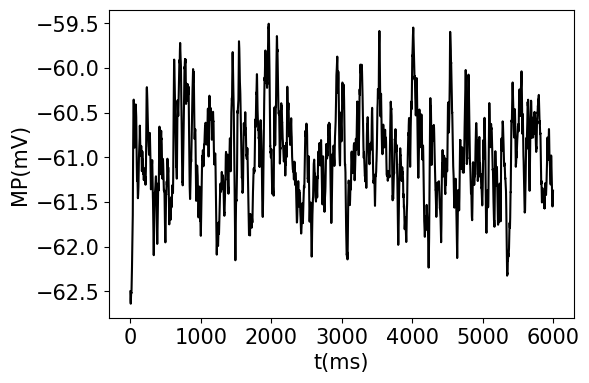

In [20]:
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
v2 = h.Vector().record(h.dend1[4](0.5)._ref_v)
ina = h.Vector().record(h.soma(0.5)._ref_ina)
ik = h.Vector().record(h.soma(0.5)._ref_ik)
ica = h.Vector().record(h.soma(0.5)._ref_ica)
vec = h.Vector()
netcon = h.NetCon(h.soma(0.5)._ref_v, None)
netcon.record(vec)
tvec0 = h.Vector()
nc1.record(tvec0)
h.finitialize(-62.5)
h.continuerun(6000)
v9 = np.array(v)[::10]
plt.figure(figsize=(6,4))
plt.plot(t, v, c='black')
plt.xlabel('t(ms)')
plt.ylabel('MP(mV)')
#plt.axhline(y=-50, ls='--', c='r')
#plt.savefig('figure/suprathreshold_trace',bbox_inches='tight')
#plt.plot(t, v2, label='dend')
#plt.legend()

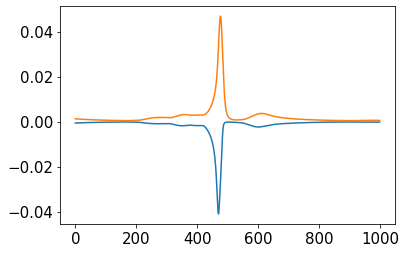

In [212]:
plt.plot(np.array(ina)[4200:5200])
plt.plot(np.array(ik)[4200:5200])

In [221]:
ik_np[420]

0.002884792775968604

In [218]:
ina_np[np.where(ina_np > -0.001802293082092216)] = -0.001802293082092216

In [222]:
ik_np[np.where(ik_np < 0.002884792775968604)] = 0.002884792775968604

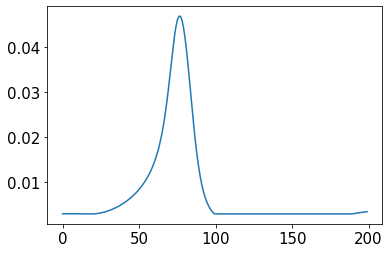

In [223]:
plt.plot(ik_np[400:600])

In [213]:
ina_np = np.array(ina)[4200:5200]
ik_np = np.array(ik)[4200:5200]

In [188]:
ina_np[50:360] = -0.0005
ik_np[50:360] = -0.0008

In [70]:
v_np = np.array(v)

In [72]:
np.argmax(v_np[:10000])

8751

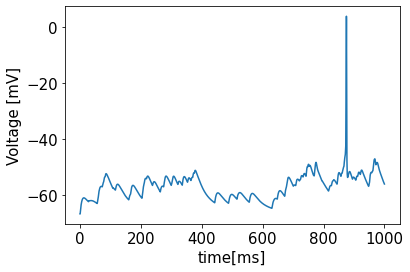

In [139]:
t = np.linspace(0, 1000, 10000)
plt.plot(t, v_np[:10000])
plt.xlabel('time[ms]')
plt.ylabel('Voltage [mV]')
plt.savefig('figure/my_tune_trace', bbox_inches='tight')

In [204]:
ina_np[361] = -0.001
ik_np[361] = 0.0008

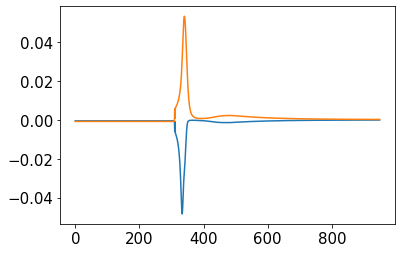

In [205]:
plt.plot(ina_np[50:])
plt.plot(ik_np[50:])

In [164]:
len(np.array(ik))

10001

In [162]:
np.min(np.array(ik)[16400:16900]*10)

ValueError: zero-size array to reduction operation minimum which has no identity

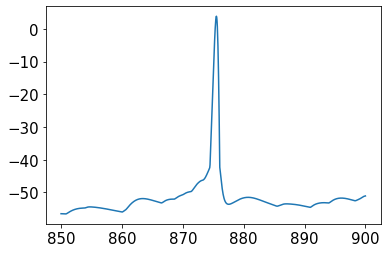

In [166]:
plt.plot(t, v_np[8241:9241])

In [228]:
np.min(ik_np * 10)

0.028847927759686042

In [232]:
ik_np[28*20:] = 0.028847927759686042/10
ina_np[28*20:] = -0.01802293082092216/10

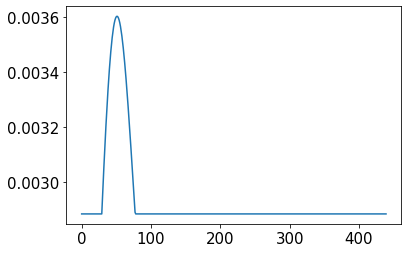

In [231]:
plt.plot(ik_np[28*20:])

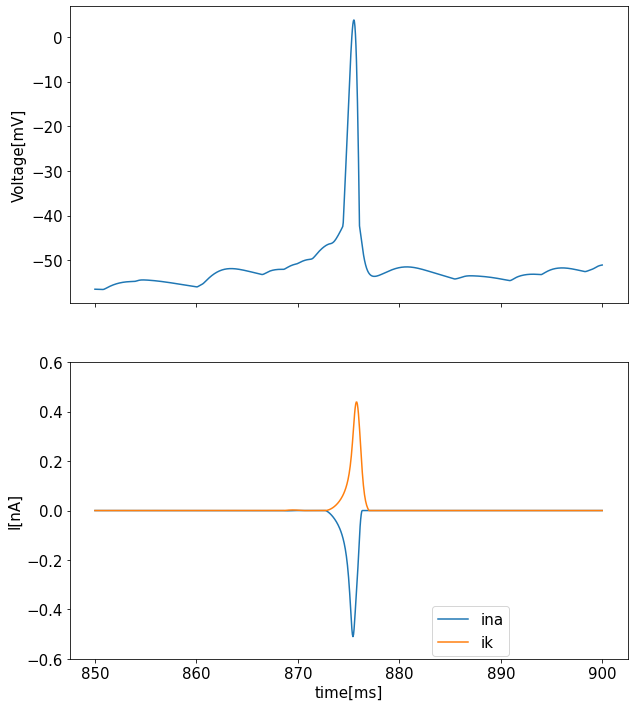

In [240]:
idx = 0
t = np.linspace(850, 900, 1000)
t2 = np.linspace(850, 900, 925)
fig, axs = plt.subplots(2,figsize=(10,12),sharex=True)
axs[0].plot(t, v_np[8241:9241])
axs[0].set_ylabel('Voltage[mV]')
#axs[0].legend(loc=(0.65,0.01))
axs[1].plot(t2, ina_np[:925] * 13+0.01802293082092216/10*13, label='ina')
axs[1].plot(t2, ik_np[:925] * 10-0.028847927759686042, label='ik')
axs[1].set_ylim(-0.6, 0.6)
axs[1].set_ylabel('I[nA]')
axs[1].set_xlabel('time[ms]')
axs[1].legend(loc=(0.65,0.01))
plt.savefig('figure/my_example_tune_trace_zoom.png', bbox_inches='tight')

In [48]:
with open('data/Vsep_single_pulse_tau7_1000ms.p', 'rb') as fo:
    Vsep1000 = pickle.load(fo, encoding='bytes')

Vsep1000 += 62.5
def Ker(x,tau):
    return np.heaviside(x, 0)*(x)/tau*np.exp(-(x)/tau)
Nsyn = 9
def model(X, K):
    # X is one sample here
    Y = np.zeros(time_dur)
    L = np.zeros((Nsyn, time_dur))
    for i in range(Nsyn):
        L[i] = np.convolve(X[i], Vsep1000[i])[:time_dur]
        Y += L[i]
        for j in range(i+1):
            Y += -K[int(i*(i+1)/2)+j] * L[i] * L[j]
    return Y

X = np.zeros((9, 1001))
X[0,0] = 1
X[0,30] = 1
K = np.array([0.05, 
            0.01, 0.01, 
            0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

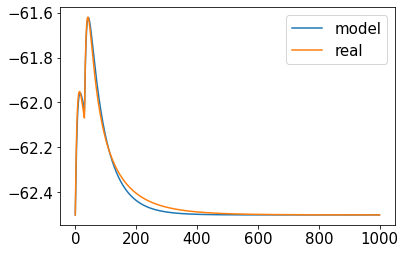

In [49]:
y = model(X, K)
plt.plot(y-62.5, label='model')
plt.plot(v7, label='real')
plt.legend()

# Dual-input Sampling

In [31]:
tr_num = 10
test_num = 10
time_dur = 1000
tr_ip = []
tr_op = np.empty((tr_num, time_dur + 1))
test_ip = []
test_op = np.empty((test_num, time_dur + 1))

for i in range(tr_num):
    #interval = np.random.randint(70, 130)
    for j in range(len(input_list)):
        ns_list[j].start = 0
        ns_list[j].number = 30
        ns_list[j].interval = 50
        ns_list[j].noise = 1
        nc_list[j].delay = 0
    for j in range(len(input_list)):
        syn_list[j].tau = 7
        syn_list[j].e = 0
        if j == 0 or j == 1:
            nc_list[j].weight[0] = 0.00005
        else:
            nc_list[j].weight[0] = 0.0000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    tr_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

print('---------------')
print('test begin')
for i in range(test_num):
    #interval = np.random.randint(70, 130)
    for j in range(len(input_list)):
        ns_list[j].start = 0
        ns_list[j].number = 30
        ns_list[j].interval = 50
        ns_list[j].noise = 1
        nc_list[j].delay = 0
    for j in range(len(input_list)):
        syn_list[j].tau = 7
        syn_list[j].e = 0
        if j == 0 or j == 1:
            nc_list[j].weight[0] = 0.00005
        else:
            nc_list[j].weight[0] = 0.0000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    test_ip.append(np.round(np.array(tvec0), decimals=0))
    test_ip.append(np.round(np.array(tvec1), decimals=0))
    test_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

with open('data/training_set_ip_passive_dual_10.p', 'wb') as f:
    pickle.dump(tr_ip, f)
with open('data/training_set_op_passive_dual_10.p', 'wb') as f:
    pickle.dump(tr_op, f) 
with open('data/testing_set_ip_passive_dual_10.p', 'wb') as f:
    pickle.dump(test_ip, f)
with open('data/testing_set_op_passive_dual_10.p', 'wb') as f:
    pickle.dump(test_op, f)

0
---------------
test begin
0


# Vsep sampling

In [12]:
time_dur = 200
Vsep = np.zeros((9, time_dur+1))
for i in range(len(input_list)):
    ns_list[i].start = 0
    ns_list[i].number = 1
    ns_list[i].interval = 50
    ns_list[i].noise = 0
    nc_list[i].delay = 0
for j in range(9):
    for i in range(len(input_list)):
        if i == j:
            nc_list[i].weight[0] = 0.00005
        else:
            nc_list[i].weight[0] = 0.00000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    Vsep[j] = np.array(v)[::10]

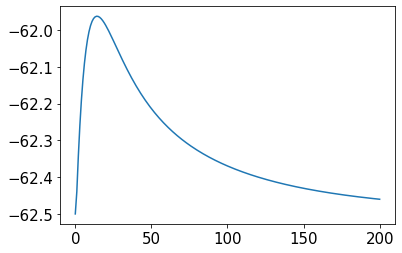

In [13]:
plt.plot(Vsep[6])

In [16]:
with open('data/Vsep_active.p', 'wb') as f:
    pickle.dump(Vsep, f)

# Sampling(passive)

In [22]:
tr_num = 10
test_num = 10
time_dur = 6000
tr_ip = []
tr_op = np.empty((tr_num, time_dur + 1))
test_ip = []
test_op = np.empty((test_num, time_dur + 1))

# E
for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 800
    ns_list[j].interval = 10
    ns_list[j].noise = 1
    nc_list[j].delay = 0
    syn_list[j].e = 100
    syn_list[j].tau = 7
    nc_list[j].weight[0] = 0.00002
    
# # EI
# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 1500
#     ns_list[i].interval = 2
#     ns_list[i].noise = 1
#     nc_list[i].delay = 0

# for i in range(len(syne_list)):
#     syne_list[i].tau = 3
#     syne_list[i].e = 100

# for i in range(len(syni_list)):
#     syni_list[i].tau = 3
#     syni_list[i].e = -80

# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00002
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(tr_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    tr_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_ip.append(np.round(np.array(tvec8), decimals=0))
    tr_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

print('---------------')
print('test begin')

# E
for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 800
    ns_list[j].interval = 10
    ns_list[j].noise = 1
    nc_list[j].delay = 0
    syn_list[j].e = 100
    syn_list[j].tau = 7
    nc_list[j].weight[0] = 0.00002

# # EI
# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 1500
#     ns_list[i].interval = 2
#     ns_list[i].noise = 1
#     nc_list[i].delay = 0

# for i in range(len(syne_list)):
#     syne_list[i].tau = 3
#     syne_list[i].e = 100

# for i in range(len(syni_list)):
#     syni_list[i].tau = 3
#     syni_list[i].e = -80

# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00002
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(test_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    test_ip.append(np.round(np.array(tvec0), decimals=0))
    test_ip.append(np.round(np.array(tvec1), decimals=0))
    test_ip.append(np.round(np.array(tvec2), decimals=0))
    test_ip.append(np.round(np.array(tvec3), decimals=0))
    test_ip.append(np.round(np.array(tvec4), decimals=0))
    test_ip.append(np.round(np.array(tvec5), decimals=0))
    test_ip.append(np.round(np.array(tvec6), decimals=0))
    test_ip.append(np.round(np.array(tvec7), decimals=0))
    test_ip.append(np.round(np.array(tvec8), decimals=0))
    test_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

with open('data/training_set_ip_temp_6000ms.p', 'wb') as f:
    pickle.dump(tr_ip, f)
with open('data/training_set_op_temp_6000ms.p', 'wb') as f:
    pickle.dump(tr_op, f) 
with open('data/testing_set_ip_temp_6000ms.p', 'wb') as f:
    pickle.dump(test_ip, f)
with open('data/testing_set_op_temp_6000ms.p', 'wb') as f:
    pickle.dump(test_op, f)

0
---------------
test begin
0


In [159]:
np.argmax(tr_op)

10941

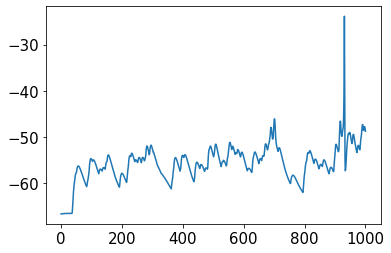

In [160]:
plt.plot(tr_op[10])

# Sampling(active)

In [36]:
tr_num = 10
test_num = 10
time_dur = 2000
tr_ip = []
tr_spike_time = []
#tr_op = np.empty((tr_num, time_dur*5 + 1))
tr_op = np.empty((tr_num, time_dur + 1))
test_ip = []
test_spike_time = []
#test_op = np.empty((test_num, time_dur*5 + 1))
test_op = np.empty((test_num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 300
    ns_list[j].interval = 10
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 100
    nc_list[j].weight[0] = 0.001
# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 30
#     ns_list[i].interval = 50
#     ns_list[i].noise = 1
#     nc_list[i].delay = 1000
# for i in range(len(syne_list)):
#     syne_list[i].tau = 7
#     syne_list[i].e = 0
# for i in range(len(syni_list)):
#     syni_list[i].tau = 7
#     syni_list[i].e = -70
# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00003
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(tr_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    spike_vec = h.Vector()
    netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_ip.append(np.round(np.array(tvec8), decimals=0))
    tr_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    #tr_op[i] = np.array(v)[10000:40010:2]
    tr_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

print('---------------')
print('test begin')

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 300
    ns_list[j].interval = 10
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 100
    nc_list[j].weight[0] = 0.001

# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 30
#     ns_list[i].interval = 50
#     ns_list[i].noise = 1
#     nc_list[i].delay = 1000
# for i in range(len(syne_list)):
#     syne_list[i].tau = 7
#     syne_list[i].e = 0
# for i in range(len(syni_list)):
#     syni_list[i].tau = 7
#     syni_list[i].e = -70
# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00003
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(test_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    spike_vec = h.Vector()
    netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    #h.continuerun(1000+time_dur)
    h.continuerun(time_dur)
    test_ip.append(np.round(np.array(tvec0), decimals=0))
    test_ip.append(np.round(np.array(tvec1), decimals=0))
    test_ip.append(np.round(np.array(tvec2), decimals=0))
    test_ip.append(np.round(np.array(tvec3), decimals=0))
    test_ip.append(np.round(np.array(tvec4), decimals=0))
    test_ip.append(np.round(np.array(tvec5), decimals=0))
    test_ip.append(np.round(np.array(tvec6), decimals=0))
    test_ip.append(np.round(np.array(tvec7), decimals=0))
    test_ip.append(np.round(np.array(tvec8), decimals=0))
    test_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    #test_op[i] = np.array(v)[10000:40010:2]
    test_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

with open('data/training_set_ip_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(tr_ip, f)
with open('data/training_set_op_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(tr_op, f) 
with open('data/testing_set_ip_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(test_ip, f)
with open('data/testing_set_op_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(test_op, f)
# with open('data/training_spike_time_10Hz_active_spike_highth_5Hz.p', 'wb') as f:
#     pickle.dump(tr_spike_time, f)
# with open('data/testing_spike_time_10Hz_active_spike_highth_5Hz.p', 'wb') as f:
#     pickle.dump(test_spike_time, f)

0
---------------
test begin
0


In [35]:
tr_spike_time[4]

array([ 202.,  576.,  700.,  789., 1070., 1221., 1319., 2328., 2976.])

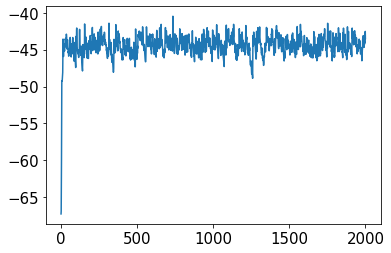

In [37]:
plt.plot(tr_op[4])

In [88]:
np.max(tr_op)

-53.65948322849977

In [89]:
len(tr_op[0])

1001

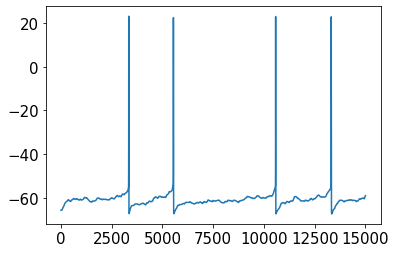

In [66]:
plt.plot(tr_op[0])
#plt.axvline(x = 1960)

In [68]:
tr_spike_time[0] * 5

array([ 3335.,  5535., 10575., 13315.])

In [67]:
tr_ip[0]

array([  40.,   95.,  140.,  364.,  410.,  429.,  434.,  442.,  594.,
        645.,  684.,  835.,  868.,  919.,  925.,  949.,  958.,  972.,
       1029., 1033., 1073., 1083., 1216., 1224., 1262., 1442., 1515.,
       1614., 1855., 1920., 1924., 1939., 2076., 2092., 2099., 2162.,
       2261., 2371., 2594., 2605., 2616., 2698., 2713., 2725., 2726.,
       2835., 2891., 2912., 2922., 2989., 2992., 3028., 3141., 3215.,
       3328., 3617., 3619., 3625., 3645., 3682., 3721., 3775., 3904.,
       3981.])

In [50]:
np.array(tvec8)

array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140.])

In [33]:
def biexponential(x, tau_rise, tau_decay):
    return (1 - np.exp(-x / tau_rise)) * np.exp(-x / tau_decay)

In [31]:
def alpha(x, tau):
    return (x / tau) * np.exp(-x / tau)